##### **Ciencia de datos**
## Ricardo Gutiérrez Argüelles
## MAEC-CIMAT
## 
## Tarea 5
## 19 de marzo de 2023

# Ejercicio 1

En la Figura 1 se muestran 6 conjuntos de datos en dos dimensiones denotados con A, B, C, D, E y F. En cada uno se usaron dos métodos de clústering, y uno de ellos fue k−means. Los centroides de cada clúster se señalan con una x, ambos ejes son proporcionales y en la misma escala para todos los conjuntos de datos. Indica, en cada conjunto, cuál solución corresponde a k−means y porqué.


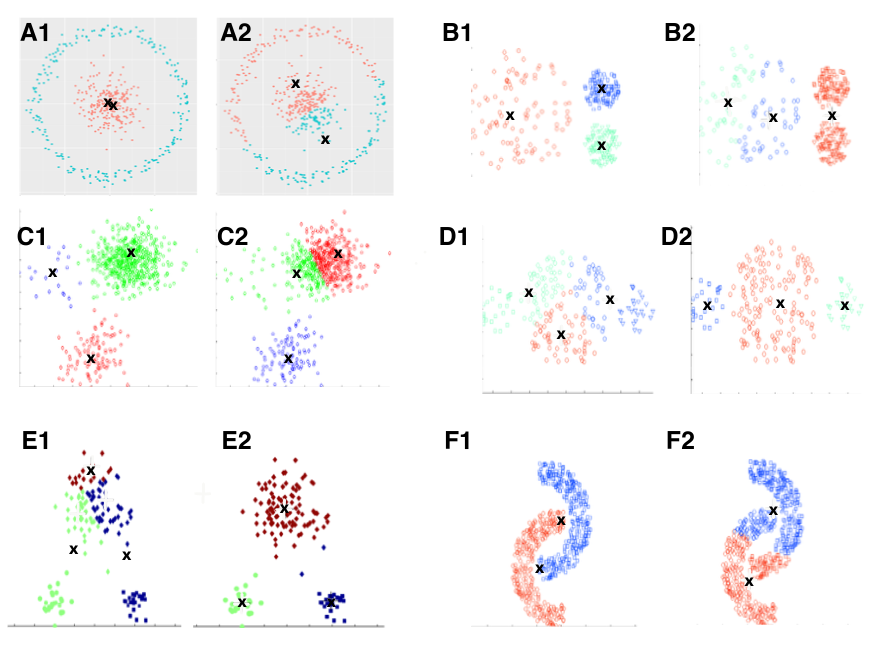

**Solución:**

El método de clústering de K-means, separa las observaciones en el número K de clusters requeridos, para lo cual se establecen igual número de k centroides entre el espacio de datos. La idea es minimizar la distancia que hay entre las observaciones y el lugar en donde se localizan los k centroides, a fin de formar los k clústeres. Esta distancia es euclideana (lineal)

Por lo tanto, es importante analizar cuáles serían los números (k) de clústeres que se requieren y con base en ello optimizar (de forma heurística) la localización de los centroides, a fin de minimizar la suma de las distancias al cuadrado entre la observación y al error (esto es similar a minimizar el error en las técnicas de regresión). 

Con esto en mente, analizamos cada par de gráficos a fin de determinar en cuál se uso el método de k-means.

- A1 y A2. En este caso se uso k-means para A2, ya que se definen dos centroides para formar 2 clústers. Así, los elementos de cada grupo se visualizan en diferente color, en donde los elementos de color rosa están más próximos del centroide localizado en la parte superior, mientras que los elementos en color azul están más cercanos del centroide localizado en la parte inferior de la gráfica. A1 no puede ser ya que los dos centroides están en el centro y aún así se forman dos grupos en donde se ignora la distancia mínima que hay al centroide.
- B1 y B2. Se utilizó k-means para B2 ya que se definen tres centroides para formar igual número de clústers. identificados por los colores azul, rojo y verde. Al respecto, los elementos identifcados en cada cluster tienen una distancia mínima al centroide al que pertenecen. Caso contrario es para el gráfico B1, ya que los elementos más a la derecha del clúster rosa, parece que tienen una distancia más cercana al centroide del clúster azul (los de la parte superior a la derecha) y al clúster verde (los de la parte inferior a la derecha).
- C1 y C2. Aquí en C1 parece que se utilizó k-means, debido a que los 3 clústeres se forman de acuerdo a su cercanía al centroide. Asimismo, parece que hubo una optimización para localizar al centroide; a diferencia de C2 en donde en el caso del centroide del custer verde y del cluster rojo forman como una fuerza de "atracción" hacia los elementos cercanos; en donde para el caso de los elementos muy a la izquierda solamente se pueden integrar al clúster verde ya que están muy alejados a los otros centroides, por lo que parece que no se optimizó el lugar donde se debe localizar el centroide,
- D1 y D2. Es el mismo caso que el anterior (C1 y C2) ya que parece que se utilizó k-means en D1, optimizando el lugar del centroide y donde los elementos de cada uno de los 3 clústers están bien definidos de acuerdo a su distancia a dicho centroide. Por otro lado, en el caso de D2, pareciera que no se optimizó el lugar del centroide, ya que los elementos muy arriba y abajo del grupo rosa parecen estar muy alejados al centroide.
- E1 y E2. De igual forma, se utilizó k-means para E2 ya que los centroides de los tres clústers parecen tener la distancia óptima para agrupar a los elementos y formar los clústers, mimimizando la distancia entre los elementos y dicho centro. En el caso de E1, no se utilizó k-means ya qye la distancia de los elementos más arriba de los clústers azul y verde no pertenece al clúster café que es donde se minimiza la distancia al centroide.
- F1 y F2. En este caso, se utilizó K-means para F2, en donde los elementos se asignan de acuerdo a la distancia euclideana entre el centroide y los elementos, en donde en este caso hay dos centroides para lo que se forman dos clústers (azul y rojo). No obstante para F1, se utilizó otra técnica mediante una distancia no lineal para formar los clústers.

# Ejercicio 2

Considera un modelo de mezclas de _k_ distribuciones:

$$
f(x)=\sum^{K}_{k=1}w_k f_k (X)
$$

donde $w_k \ge 0 $ y $\Sigma_k w_k=1$. En este caso, supondremos que $f_k = N (\mu_k, \Sigma_k)$. 

Supón que tienes datos $x_1, x_2, ..., x_n \sim f(x)$, con $x$ y queremos ajustar el modelo de mezclas Gaussianas (GMM) para usarlo como un soft-clustering.

Es fácil ver (no es necesario demostrarlo), que los parámetros de máxima verosimilitud son:

$\mu_k=\frac{1}{n_k} \sum^{n}_{i=1} \gamma_i^k x_i, \ \  \Sigma_k= \frac{1}{n_k} \sum^{n}_{i=1} \gamma_i^k  (x_i - \mu_k)(x_i - \mu_k)', \ \ w_k=\frac{n_k}{n}$

donde $\gamma^k_i$ es una medida de probabilidad de pertenenica de una observación _i_ al cluster _k_.

Implementa un método de clustering usando el algoritmo 1:


---
Algorithm 1 GMM-EM


---




1.   Inicializa los parámetros del modelo y los pesos $w_k$, y obtén el valor inicial de la log-verosimilitud:
$$
log p(X|\mu,\Sigma, w) = \sum^{n}_{i=1}log \sum^{K}_{k=1} w_k N (x_i|\mu _k, \Sigma_k)
$$

2.   _Expectation_ : asigna las "responsabilidades" de cada dato, es decir, la asignación de un dato al cluster $k$, que en este esquema es la probabilidad de que una observación se genere de la distribución $k$:
$$
\gamma_i^k = P(C(i)=k|X=x_i)=\frac{w_kf_k(x_i; \mu _k, \Sigma_k)}
{\sum_k w_kf_k(x_i; \mu _k, \Sigma_k)}
$$

3. _Maximization_ : actualiza los parámetros $\mu _{k}^{new}, \Sigma _{k}^{new}$ y $w _{k}^{new}$ usando las responsabilidades obtenidas. Observa que en este paso, usamos la "asignación suave" de cada punto a un cluster $k$, por lo tanto, cada observación debe ser pesada por su correspondiente responsabilidad, y en consecuencia, el número de puntos "asignados" a algún cluster $k$ será $n_k=\sum^{n}_{i=1}\gamma_i^k$.
4. Repite los pasos 2 y 3 hasta que la log-verosimilitud converja.


---

Prueba tu implementación con un conjunto de datos sintéticos bien escogidos en dos dimensiones y compáralo contra fuzzy $k$-means. Discute los resultados.


In [ ]:
pip install python-utils

In [ ]:
#Función Util donde viene la función de plot
# Lo pongo aquí pero lo guardé en un archivo .py tal como el ruso
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  chi2

def plot_ellipse(semimaj=1,semimin=1,phi=0,x_cent=0,y_cent=0,theta_num=int(1e3),ax=None,plot_kwargs=None,\
                    fill=False,fill_kwargs=None,data_out=False,cov=None,mass_level=0.68):
    '''
        An easy to use function for plotting ellipses in Python 2.7!
        The function creates a 2D ellipse in polar coordinates then transforms to cartesian coordinates.
        It can take a covariance matrix and plot contours from it.
        
        semimaj : float
            length of semimajor axis (always taken to be some phi (-90<phi<90 deg) from positive x-axis!)
        semimin : float
            length of semiminor axis
        phi : float
            angle in radians of semimajor axis above positive x axis
        x_cent : float
            X coordinate center
        y_cent : float
            Y coordinate center
        theta_num : int
            Number of points to sample along ellipse from 0-2pi
        ax : matplotlib axis property
            A pre-created matplotlib axis
        plot_kwargs : dictionary
            matplotlib.plot() keyword arguments
        fill : bool
            A flag to fill the inside of the ellipse 
        fill_kwargs : dictionary
            Keyword arguments for matplotlib.fill()
        data_out : bool
            A flag to return the ellipse samples without plotting
        cov : ndarray of shape (2,2)
            A 2x2 covariance matrix, if given this will overwrite semimaj, semimin and phi
        mass_level : float
            if supplied cov, mass_level is the contour defining fractional probability mass enclosed
            for example: mass_level = 0.68 is the standard 68% mass
    '''
    # Get Ellipse Properties from cov matrix
    if cov is not None:
        eig_vec,eig_val,u = np.linalg.svd(cov)
        # Make sure 0th eigenvector has positive x-coordinate
        if eig_vec[0][0] < 0:
            eig_vec[0] *= -1
        semimaj = np.sqrt(eig_val[0])
        semimin = np.sqrt(eig_val[1])
        if mass_level is None:
            multiplier = np.sqrt(2.279)
        else:
            distances = np.linspace(0,20,20001)
            chi2_cdf = chi2.cdf(distances,df=2)
            multiplier = np.sqrt(distances[np.where(np.abs(chi2_cdf-mass_level)==np.abs(chi2_cdf-mass_level).min())[0][0]])
        semimaj *= multiplier
        semimin *= multiplier
        phi = np.arccos(np.dot(eig_vec[0],np.array([1,0])))
        if eig_vec[0][1] < 0 and phi > 0:
            phi *= -1

    # Generate data for ellipse structure
    theta = np.linspace(0,2*np.pi,theta_num)
    r = 1 / np.sqrt((np.cos(theta))**2 + (np.sin(theta))**2)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    data = np.array([x,y])
    S = np.array([[semimaj,0],[0,semimin]])
    R = np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
    T = np.dot(R,S)
    data = np.dot(T,data)
    data[0] += x_cent
    data[1] += y_cent

    # Output data?
    if data_out == True:
        return data

    # Plot!
    return_fig = False
    if ax is None:
        return_fig = True
        fig,ax = plt.subplots()

    if plot_kwargs is None:
        ax.plot(data[0],data[1],color='b',linestyle='-')
    else:
        ax.plot(data[0],data[1],**plot_kwargs)

    if fill == True:
        ax.fill(data[0],data[1],**fill_kwargs)

    if return_fig == True:
        return fig


def plot(plotDetails:dict):
    data = plotDetails['data']
    predictions = plotDetails['predictions']
    mu = plotDetails['mu']
    cov = plotDetails['cov']
    ax = plt.axes()
    ax.scatter(data[:,0], data[:,1], c=predictions, cmap='Pastel2')
    ax.plot(mu[:,0], mu[:,1], 'bx')
    for k in range(len(cov)):
        plot_ellipse(x_cent=mu[k,0], y_cent=mu[k,1], cov=cov[k][0:2,0:2], ax=ax)
    plt.title(plotDetails['title'] + ', epoch = ' + str(plotDetails['epoch']))
    plt.xlabel(plotDetails['xlabel'])
    plt.ylabel(plotDetails['ylabel'])
    plt.show()

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

import numpy as np
import matplotlib as plt
from scipy.stats import multivariate_normal

import numpy as np
import matplotlib.pyplot as plt
import csv
import random
from matplotlib import image
from scipy.stats import multivariate_normal

from util import plot

In [ ]:
#Definimos la matriz de varianzas y covarianzas 
def covMatrix(X: np.ndarray, mean: np.ndarray):
    delta = np.array(X - mean)
    return np.matmul(delta.T, delta) / X.shape[0]

#Definimos la función de log verosimilitud
def logLikelihood(X: np.ndarray, weights: np.ndarray, means: np.ndarray, covariances: np.ndarray):
    outer = np.zeros(X.shape[0])
    for k in range(len(weights)):
        outer += multivariate_normal.pdf(X, means[k], covariances[k])*weights[k]
    return np.sum(np.log(outer))

In [ ]:
#Paso E
def EStep(X: np.ndarray, weights: np.ndarray, means: np.ndarray, covariances: list):
    # dimen(X) = m x n
    # dimen(weights) = K x 1
    # dimen(means) = K x n
    # dimen(covariances) = K x n x n
    K = len(weights)
    gamma = np.zeros((X.shape[0], K))
    for k in range(K):
        gamma[:,k] = multivariate_normal.pdf(X, means[k], covariances[k]) * weights[k]
    return gamma / np.sum(gamma, 1).reshape(X.shape[0], 1)


In [ ]:
#Paso M
def MStep(X: np.ndarray, gamma: np.ndarray):
    denom = np.sum(gamma, axis=0)
    weights = denom / X.shape[0]
    means = np.matmul(X.T, gamma) / denom
    means = means.T
    covs = np.array([np.matmul((X - means[k]).T, (X - means[k]) * gamma[:,k].reshape(X.shape[0], 1)) / denom[k] for k in range(gamma.shape[1])])
    return weights, means, covs

In [ ]:
#Inicialización

#Definimos valores iniciales
def initialMeans(X : np.ndarray, K : int):
    rows = np.random.randint(0, X.shape[0]-1, size=K)
    return X[rows][:]

def initialCov(X : np.ndarray, K:int):
    mean = np.average(X, axis=0)
    sigma = covMatrix(X, mean)
    return [np.diag(np.diag(sigma)) for _ in range(K)]

def initialWeights(K: int):
    return np.array([1/K for _ in range(K)])

#Definimos la función de log verosimilitud
#def logLikelihood(X: np.ndarray,  medias_inicio: np.ndarray, cov_inicio: np.ndarray, pesos_inicio: np.ndarray,):
#    resultados = np.zeros(X.shape[0])
#    for K in range(len(pesos)):
#        resultados += multivariate_normal.pdf(X, medias_inicio[K], cov_inicio[K])*pesos_inicio[K]
#    return np.sum(np.log(resultados))

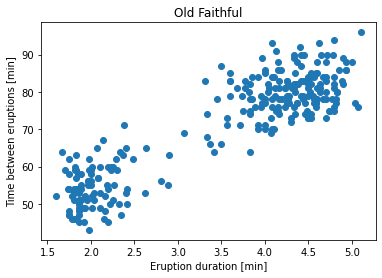

In [ ]:
with open('C:/Users/Ricardo Gutierrez/oldFaithful.tsv') as file:
    tsv = csv.reader(file, delimiter='\t')
    cnt = 0
    oldFaithful = [] 
    for line in tsv:
        if cnt != 0:
            oldFaithful.append([float(s) for s in line])
        cnt+=1
data = np.array(oldFaithful)

plt.scatter(data[:,0], data[:,1])
plt.title('Old Faithful')
plt.xlabel('Eruption duration [min]')
plt.ylabel('Time between eruptions [min]')
plt.show()

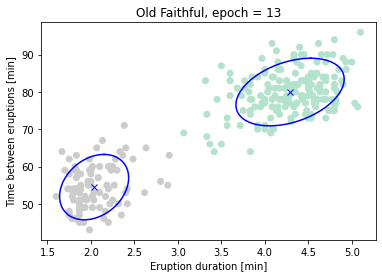

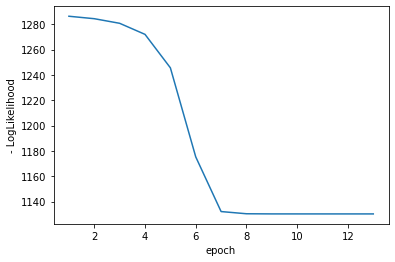

In [ ]:
#Primera prubea

np.random.seed(5555)
K = 2
mu = initialMeans(data, K)
cov = initialCov(data, K)
weights = initialWeights(K)
threshold = 1e-5
ll = float('inf')
epoch = 0
ll_history = []
showIntermediate = False
while True:
    epoch += 1
    gamma = EStep(data, weights, mu, cov)
    if showIntermediate and epoch % 5 == 1:
        # plot!
        plot({
            'data': data,
            'predictions': np.argmax(gamma, axis=1),
            'mu': mu,
            'cov': cov,
            'epoch': epoch,
            'title': 'Old Faithful',
            'xlabel': 'Eruption duration [min]',
            'ylabel': 'Time between eruptions [min]'
        })
    weights, mu, cov = MStep(data, gamma)
    newLl = logLikelihood(data, weights, mu, cov)
    ll_history.append(-newLl)
    if abs(newLl - ll) < threshold:
        break
    ll = newLl
    
    # remove clusters
    toDel = []
    for w in range(len(weights)):
        if weights[w] < 1/(2*K):
            toDel.append(w)
    weights = np.delete(weights, toDel, axis=0)
    mu = np.delete(mu, toDel, axis=0)
    cov = np.delete(cov, toDel, axis=0)

plot({
    'data': data,
    'predictions': np.argmax(gamma, axis=1),
    'mu': mu,
    'cov': cov,
    'epoch': epoch,
    'title': 'Old Faithful',
    'xlabel': 'Eruption duration [min]',
    'ylabel': 'Time between eruptions [min]'
})
plt.plot(np.arange(1, epoch+1), ll_history)
plt.xlabel('epoch')
plt.ylabel('- LogLikelihood')
plt.show()

In [ ]:
# K means

# Ejercicio 3

Los datos que se encuentran en el archivo IMM_2020.xls corresponden al índice de marginación (IM) por cada municipio del país, calculado por el consejo nacional de población (CONAPO) en 2020, y es hasta la fecha, el más reciente. El archivo contiene también los valores de varios indicadores que representan "nueve formas de exclusión de la marginación en las dimensiones: educación, vivienda, distribución de la población e ingresos monetarios;"$^1$, y fueron construidos en base a la información del censo de población y vivienda 2020 realizado por INEGI. Estos indicadores se usan para calcular el IM según se describe en la _Nota técnico-metodológica_$^2$. El índice de marginación por municipio se muestra de forma categorizada en la Figura 2.


---

$^1$Nota técnico-metodológica para el índice de marginación por entidad federativa y municipio 2020. CONAPO.

$^2$ ver Nota_tecnica_IMEyM_2020.pdf.



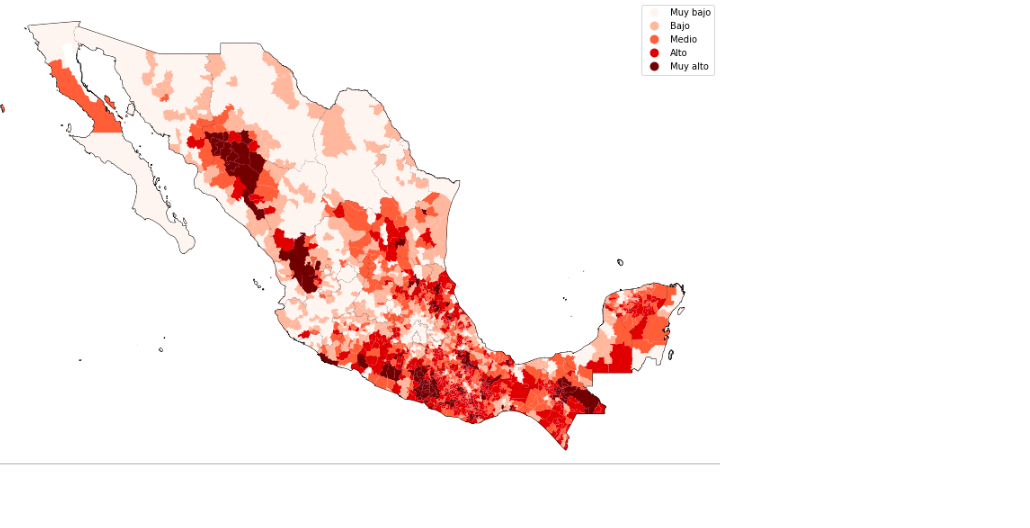

a) Realiza un análisis de clústering con $k$-means usando los 9 indicadores de CONAPO. ¿Puedes agrupar los municipios según su grado de marginación? ¿Qué efecto tiene en el resultado la estandarización de los datos?

b) Repite el ejercicio anterior usando $p$ componentes principales obtenidos con PCA y Kernel PCA (elige el valor de $p$ y justifícalo). ¿Qué puedes decir respecto a los resultados obtenidos? Realiza una visualización de los resultados en una (o unas) gráfica(s) de dos dimensiones. ¿Detectas patrones interesantes?

El resultado de éste ejercicio debe ser un reporte breve y claro con tus hallazgos y/o conclusiones, usando las ilustraciones informativas que creas apropiadas$^3$.


---


$^3$En *grafica_im_municipal2020.py* se encuentra un script en python que usé para visualizar el IM mediante la Figura 2. Puedes usarlo o modificarlo para éste ejercicio si deseas.

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 13.6 MB/s eta 0:00:00


#modificación de directorio

In [4]:
import os
import pandas as pd
import numpy as np
import os
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

##data_dir = 'C:/Users/Ricardo Gutierrez'
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/4to semestre/Ciencia de datos/Tarea 5')

data_dir = '/content/drive/MyDrive/Colab Notebooks/4to semestre/Ciencia de datos/Tarea 5/'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
#base = gpd.read_file(fileindex)
#fileindex = os.path.join(data_dir, 'mg2021_integrado_tarea/conjunto_de_datos/00mun.shp')
#layer = gpd.read_file(fileindex, index_col='CVEGEO')
#layer = layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios


In [5]:
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex)
fileindex = os.path.join(data_dir, 'mg2021_integrado_tarea/conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex, index_col='CVEGEO')
layer = layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios

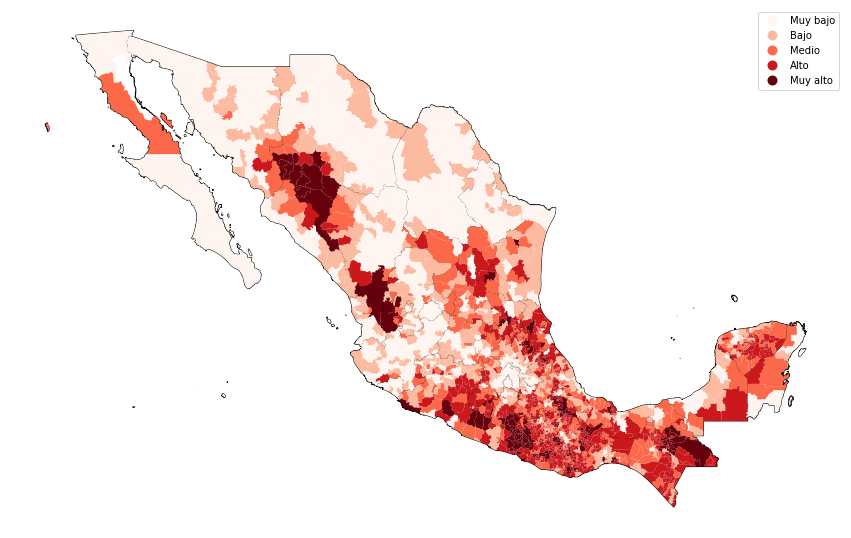

In [6]:

# datos del índice de marginación
fileindex = os.path.join(data_dir, 'IMM_2020.xls')
# especifica el tipo de variable string para los códigos de entidades y municipios
lst_str_cols = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']
dict_dtypes = {x : 'str'  for x in lst_str_cols}
marg_municipal = pd.read_excel(fileindex,sheet_name='IMM_2020', dtype=dict_dtypes)
marg_municipal = marg_municipal.set_index('CVE_MUN')
# une la información cartográfica y del IM
layer_marg = layer.merge(marg_municipal, left_on='CVEGEO',right_on='CVE_MUN')
# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat = pd.CategoricalIndex(layer_marg['GM_2020'], categories=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg.plot(column='GM_2020', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds", 
           categories = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']) 
# Remove axis
ax.set_axis_off()
plt.show()


In [7]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
%matplotlib inline



In [8]:
base_marg= marg_municipal[["ANALF", "SBASC", "OVSDE", "OVSEE", "OVSAE", 
                           "OVPT", "VHAC", "PL.5000", "PO2SM"]]
base_marg

,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
CVE_MUN,,,,,,,,,
01001,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594
01002,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471
01003,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777
01004,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369
01005,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753
...,...,...,...,...,...,...,...,...,...
32054,7.497894,36.678176,3.010808,0.452908,2.254246,1.137416,21.932484,100.000000,90.877128
32055,4.199744,44.806459,2.536486,0.551254,1.073864,0.895418,15.269627,56.774827,81.912592
32056,1.442438,19.436229,0.294739,0.163292,1.278559,0.484463,9.340958,7.461549,57.885307


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

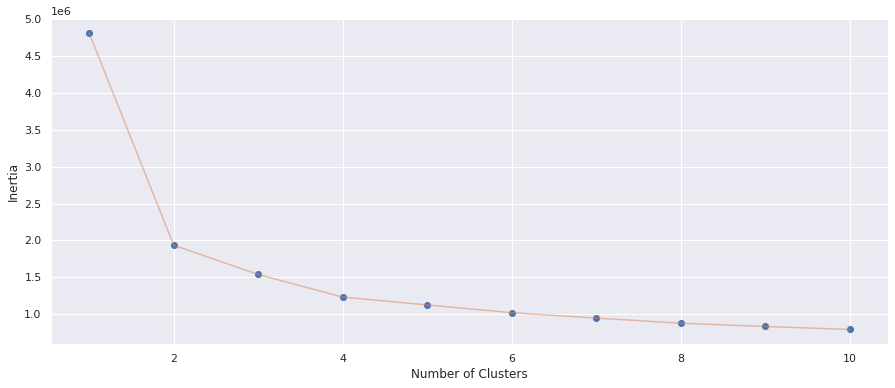

In [9]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(base_marg)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
     

In [10]:

#Especificamos el número de clusters para el objeto KMeans
kmeans=KMeans(n_clusters=6)

#Analizamos el clustering de los datos de la base de marg_municipal y vemos el resultado
kmeans.fit(base_marg.values)
print(kmeans.labels_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 4 4 ... 1 3 0]


In [11]:
kmeans=KMeans(6)
kmeans.fit(base_marg)
indentified_clusters = kmeans.fit_predict(base_marg)
data_with_clusters = base_marg.copy()
data_with_clusters['Clusters'] = indentified_clusters 
print(data_with_clusters)

result = data_with_clusters.dtypes

print("Output:")
print(result)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            ANALF      SBASC     OVSDE     OVSEE     OVSAE      OVPT  \
CVE_MUN                                                                
01001    1.644738  20.367220  0.104799  0.113169  0.378610  0.591434   
01002    3.526405  33.906364  2.650373  0.486448  0.858160  1.352430   
01003    4.491509  42.482450  0.365177  0.516760  0.800978  1.040411   
01004    3.144867  27.696745  0.712855  0.577354  0.659833  1.030989   
01005    2.380588  26.692477  0.277034  0.354957  0.860426  1.312652   
...           ...        ...       ...       ...       ...       ...   
32054    7.497894  36.678176  3.010808  0.452908  2.254246  1.137416   
32055    4.199744  44.806459  2.536486  0.551254  1.073864  0.895418   
32056    1.442438  19.436229  0.294739  0.163292  1.278559  0.484463   
32057    5.119108  31.992586  3.066130  0.500392  2.860086  1.344192   
32058    5.626223  44.226179  1.087745  0.471356  0.507614  1.667875   

              VHAC     PL.5000      PO2SM  Clusters  
CVE_MUN  

#quitar

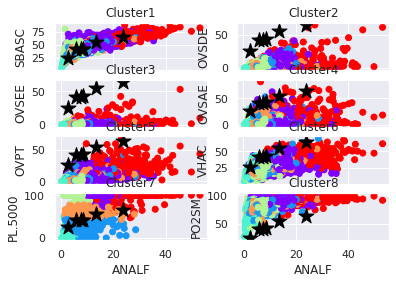

In [12]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure()
fig.clf()
ax = fig.subplots(4,2)

  
ax[0,0].scatter(data_with_clusters['ANALF'],data_with_clusters['SBASC'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[0,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('SBASC')
ax[0,0].set_title('Cluster1')
  
ax[0,1].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSDE'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[0,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('OVSDE')
ax[0,1].set_title('Cluster2')

ax[1,0].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSEE'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[1,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[1,0].set_xlabel('ANALF')
ax[1,0].set_ylabel('OVSEE')
ax[1,0].set_title('Cluster3')
  
ax[1,1].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSAE'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[1,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[1,1].set_xlabel('ANALF')
ax[1,1].set_ylabel('OVSAE')
ax[1,1].set_title('Cluster4')
 
ax[2,0].scatter(data_with_clusters['ANALF'],data_with_clusters['OVPT'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[2,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[2,0].set_xlabel('ANALF')
ax[2,0].set_ylabel('OVPT')
ax[2,0].set_title('Cluster5')
  
ax[2,1].scatter(data_with_clusters['ANALF'],data_with_clusters['VHAC'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[2,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[2,1].set_xlabel('ANALF')
ax[2,1].set_ylabel('VHAC')
ax[2,1].set_title('Cluster6')

ax[3,0].scatter(data_with_clusters['ANALF'],data_with_clusters['PL.5000'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[3,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[3,0].set_xlabel('ANALF')
ax[3,0].set_ylabel('PL.5000')
ax[3,0].set_title('Cluster7')

ax[3,1].scatter(data_with_clusters['ANALF'],data_with_clusters['PO2SM'],
        c=data_with_clusters['Clusters'],cmap='rainbow')
ax[3,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
ax[3,1].set_xlabel('ANALF')
ax[3,1].set_ylabel('PO2SM')
ax[3,1].set_title('Cluster8')
  
fig.show()

Se muestran los 36 gráficas

C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/4100807992.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/4100807992.py:83: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


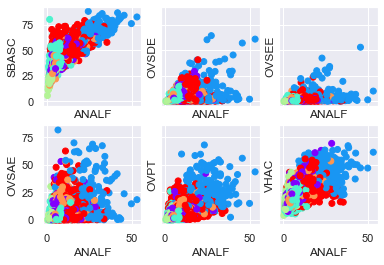

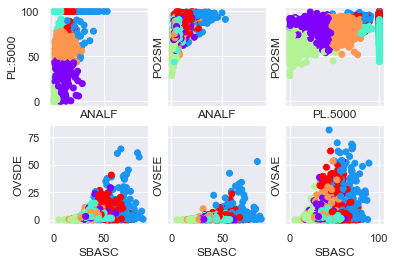

In [ ]:
#Número de variables =9
#Número de gráficas = n(n-1)/2= 9*8/2= 36 gráficas

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('SBASC')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('OVSDE')

ax[0,2].set_xlabel('ANALF')
ax[0,2].set_ylabel('OVSEE')

ax[1,0].set_xlabel('ANALF')
ax[1,0].set_ylabel('OVSAE')

ax[1,1].set_xlabel('ANALF')
ax[1,1].set_ylabel('OVPT')

ax[1,2].set_xlabel('ANALF')
ax[1,2].set_ylabel('VHAC')

ax[0,0].scatter(data_with_clusters['ANALF'],data_with_clusters['SBASC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSDE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSEE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSAE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['ANALF'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['ANALF'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('PL:5000')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('PO2SM')

ax[0,2].set_xlabel('PL.5000')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('OVSDE')

ax[1,1].set_xlabel('SBASC')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('SBASC')
ax[1,2].set_ylabel('OVSAE')

ax[0,0].scatter(data_with_clusters['ANALF'],data_with_clusters['PL.5000'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['ANALF'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['PL.5000'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['SBASC'],data_with_clusters['OVSDE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['SBASC'],data_with_clusters['OVSEE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['SBASC'],data_with_clusters['OVSAE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

fig.show() 

C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/3439280468.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/3439280468.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


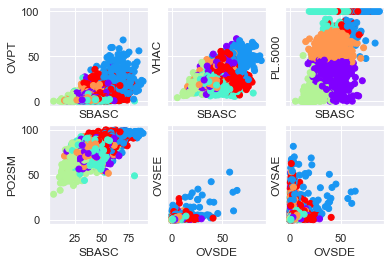

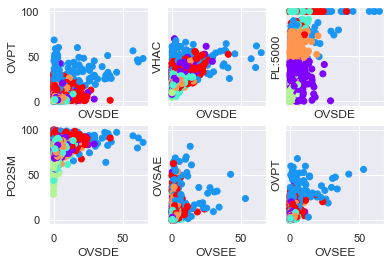

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('SBASC')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('SBASC')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('SBASC')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSDE')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('OVSDE')
ax[1,2].set_ylabel('OVSAE')


ax[0,0].scatter(data_with_clusters['SBASC'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['SBASC'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['SBASC'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['SBASC'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['OVSDE'],data_with_clusters['OVSEE'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['OVSDE'],data_with_clusters['OVSAE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')


fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSDE')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('OVSDE')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVSDE')
ax[0,2].set_ylabel('PL:5000')

ax[1,0].set_xlabel('OVSDE')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSEE')
ax[1,1].set_ylabel('OVSAE')

ax[1,2].set_xlabel('OVSEE')
ax[1,2].set_ylabel('OVPT')

ax[0,0].scatter(data_with_clusters['OVSDE'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['OVSDE'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['OVSDE'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['OVSDE'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['OVSEE'],data_with_clusters['OVSAE'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['OVSEE'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')


fig.show()

C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/2826353400.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/2826353400.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


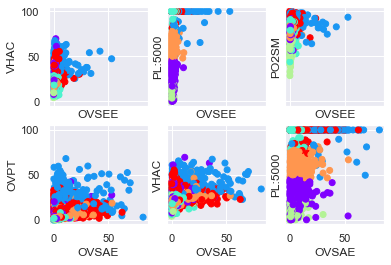

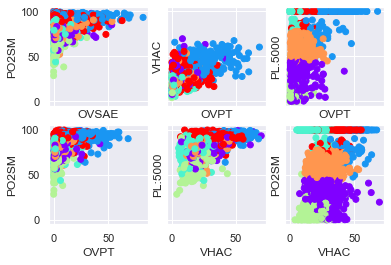

In [ ]:

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSEE')
ax[0,0].set_ylabel('VHAC')

ax[0,1].set_xlabel('OVSEE')
ax[0,1].set_ylabel('PL:5000')

ax[0,2].set_xlabel('OVSEE')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('OVSAE')
ax[1,0].set_ylabel('OVPT')

ax[1,1].set_xlabel('OVSAE')
ax[1,1].set_ylabel('VHAC')

ax[1,2].set_xlabel('OVSAE')
ax[1,2].set_ylabel('PL:5000')

ax[0,0].scatter(data_with_clusters['OVSEE'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['OVSEE'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['OVSEE'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['OVSAE'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['OVSAE'],data_with_clusters['VHAC'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['OVSAE'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

fig.show()


fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSAE')
ax[0,0].set_ylabel('PO2SM')

ax[0,1].set_xlabel('OVPT')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVPT')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('OVPT')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('VHAC')
ax[1,1].set_ylabel('PL:5000')

ax[1,2].set_xlabel('VHAC')
ax[1,2].set_ylabel('PO2SM')

ax[0,0].scatter(data_with_clusters['OVSAE'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['OVPT'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['OVPT'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['OVPT'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['VHAC'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['VHAC'],data_with_clusters['PO2SM'],
             c=data_with_clusters['Clusters'],cmap='rainbow')



fig.show()

Datos estandarizados

In [13]:
import pandas as pd
#from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import scale

In [16]:
base_marg
labelList=list(base_marg.iloc[:, 0]) #guardamos los nombres de los estados

In [15]:
datos_scaled = scale(X=base_marg, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=base_marg.columns, index=labelList)
datos_scaled.head(8)

,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
1.644738,-1.116304,-1.823180,-0.577729,-0.501200,-0.620885,-0.824341,-1.533083,-1.769023,-2.360259
3.526405,-0.869757,-0.854629,-0.096363,-0.366374,-0.569009,-0.739520,-0.342389,0.235974,-0.302534
4.491509,-0.743304,-0.241121,-0.528492,-0.355425,-0.575194,-0.774297,-0.694081,-0.527478,-0.243834
3.144867,-0.919748,-1.298848,-0.462746,-0.333540,-0.590463,-0.775348,-0.363688,-0.125633,-0.035296
2.380588,-1.019889,-1.370690,-0.545160,-0.413867,-0.568764,-0.743953,-0.960065,-0.928411,-2.147024
2.732339,-0.973800,-1.439952,-0.495180,-0.388393,-0.548823,-0.811612,-0.707677,-1.053185,-1.505645
3.445917,-0.880303,-1.341942,-0.414901,-0.360995,-0.550720,-0.745067,-0.528210,-0.726455,-0.464986
2.439773,-1.012134,-1.247112,-0.199088,-0.208865,-0.476992,-0.794448,-0.471783,-0.811110,-0.569233


#cambio en data with clusters para diferencias entre k-means con datos estandarizados (data_with_clusters_est) y sin estandarizar (data_with_clusters)
también en identified_clusters

In [19]:
kmeans=KMeans(5)
kmeans.fit(datos_scaled)
indentified_clusters_est = kmeans.fit_predict(datos_scaled)
data_with_clusters_est = base_marg.copy()
data_with_clusters_est['Clusters'] = indentified_clusters_est 
print(data_with_clusters_est)

result = data_with_clusters_est.dtypes

print("Output:")
print(result)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            ANALF      SBASC     OVSDE     OVSEE     OVSAE      OVPT  \
CVE_MUN                                                                
01001    1.644738  20.367220  0.104799  0.113169  0.378610  0.591434   
01002    3.526405  33.906364  2.650373  0.486448  0.858160  1.352430   
01003    4.491509  42.482450  0.365177  0.516760  0.800978  1.040411   
01004    3.144867  27.696745  0.712855  0.577354  0.659833  1.030989   
01005    2.380588  26.692477  0.277034  0.354957  0.860426  1.312652   
...           ...        ...       ...       ...       ...       ...   
32054    7.497894  36.678176  3.010808  0.452908  2.254246  1.137416   
32055    4.199744  44.806459  2.536486  0.551254  1.073864  0.895418   
32056    1.442438  19.436229  0.294739  0.163292  1.278559  0.484463   
32057    5.119108  31.992586  3.066130  0.500392  2.860086  1.344192   
32058    5.626223  44.226179  1.087745  0.471356  0.507614  1.667875   

              VHAC     PL.5000      PO2SM  Clusters  
CVE_MUN  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/3648371707.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/3648371707.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


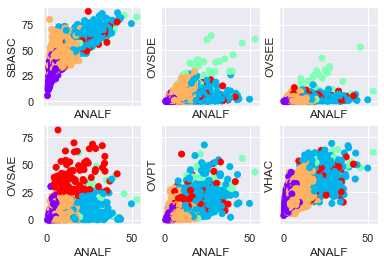

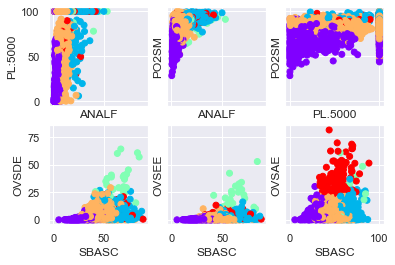

In [ ]:
#Número de variables =9
#Número de gráficas = n(n-1)/2= 9*8/2= 36 gráficas
#Datos estandarizados

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('SBASC')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('OVSDE')

ax[0,2].set_xlabel('ANALF')
ax[0,2].set_ylabel('OVSEE')

ax[1,0].set_xlabel('ANALF')
ax[1,0].set_ylabel('OVSAE')

ax[1,1].set_xlabel('ANALF')
ax[1,1].set_ylabel('OVPT')

ax[1,2].set_xlabel('ANALF')
ax[1,2].set_ylabel('VHAC')

ax[0,0].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['SBASC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVSDE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVSEE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVSAE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('PL:5000')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('PO2SM')

ax[0,2].set_xlabel('PL.5000')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('OVSDE')

ax[1,1].set_xlabel('SBASC')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('SBASC')
ax[1,2].set_ylabel('OVSAE')

ax[0,0].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['PL.5000'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['PL.5000'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVSDE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVSEE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVSAE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

fig.show() 

C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/2041271853.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/2041271853.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


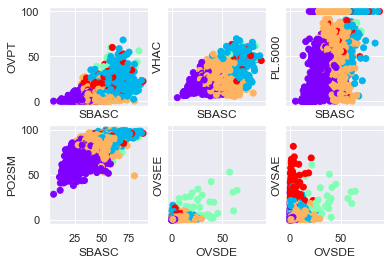

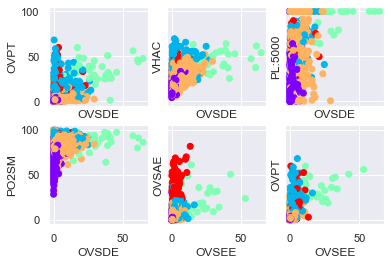

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('SBASC')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('SBASC')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('SBASC')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSDE')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('OVSDE')
ax[1,2].set_ylabel('OVSAE')


ax[0,0].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['OVSEE'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['OVSAE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')


fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSDE')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('OVSDE')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVSDE')
ax[0,2].set_ylabel('PL:5000')

ax[1,0].set_xlabel('OVSDE')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSEE')
ax[1,1].set_ylabel('OVSAE')

ax[1,2].set_xlabel('OVSEE')
ax[1,2].set_ylabel('OVPT')

ax[0,0].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['OVSAE'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')


fig.show()

C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/3790688164.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\RICARD~1\AppData\Local\Temp/ipykernel_14040/3790688164.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


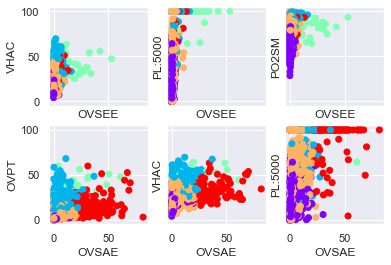

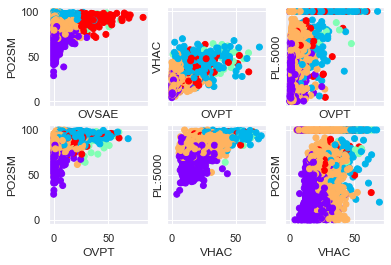

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSEE')
ax[0,0].set_ylabel('VHAC')

ax[0,1].set_xlabel('OVSEE')
ax[0,1].set_ylabel('PL:5000')

ax[0,2].set_xlabel('OVSEE')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('OVSAE')
ax[1,0].set_ylabel('OVPT')

ax[1,1].set_xlabel('OVSAE')
ax[1,1].set_ylabel('VHAC')

ax[1,2].set_xlabel('OVSAE')
ax[1,2].set_ylabel('PL:5000')

ax[0,0].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['VHAC'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

fig.show()


fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSAE')
ax[0,0].set_ylabel('PO2SM')

ax[0,1].set_xlabel('OVPT')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVPT')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('OVPT')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('VHAC')
ax[1,1].set_ylabel('PL:5000')

ax[1,2].set_xlabel('VHAC')
ax[1,2].set_ylabel('PO2SM')

ax[0,0].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['OVPT'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['OVPT'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['OVPT'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['VHAC'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['VHAC'], data_with_clusters_est['PO2SM'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')



fig.show()

#mapas

Con datos sin estandarizar

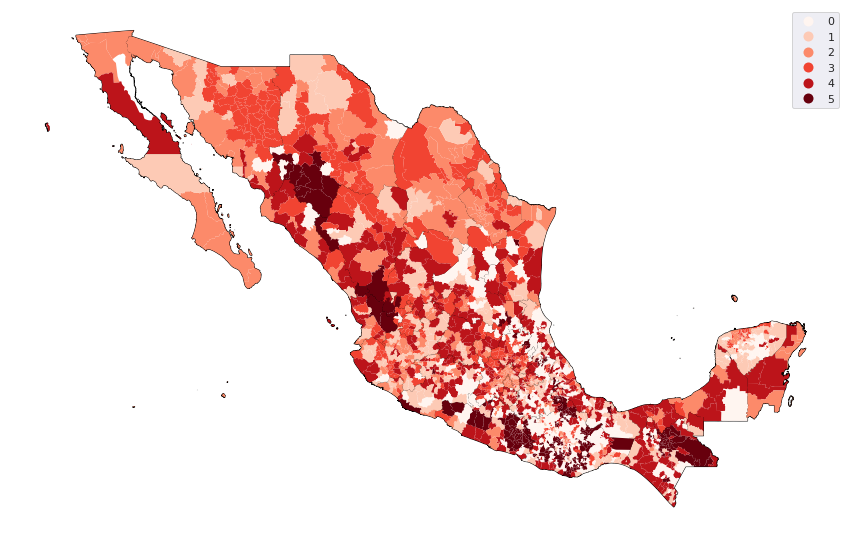

In [20]:
#generamos una copia de los datos originales para graficar el mapa con los clusters generados
marg_municipal_cop= marg_municipal
#guardamos los clusters generados con los datos originales
y = np.array(data_with_clusters["Clusters"])
#guardamos los clusters generados con los datos estandarizados
y_est = np.array(data_with_clusters_est["Clusters"])
#montamos los cluster a los municipios
marg_municipal_cop['Clusters'] = y 
marg_municipal_cop['Clusters_estand'] = y_est

# une la información cartográfica y del IM
layer_marg_2 = layer.merge(marg_municipal_cop, left_on='CVEGEO',right_on='CVE_MUN')
layer_marg_2 

# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2 = pd.CategoricalIndex(layer_marg_2['Clusters'], categories=[0, 1, 2, 3, 4, 5],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2.plot(column='Clusters', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3, 4, 5]) 
# Remove axis
ax.set_axis_off()
plt.show()

Con datos estandarizados

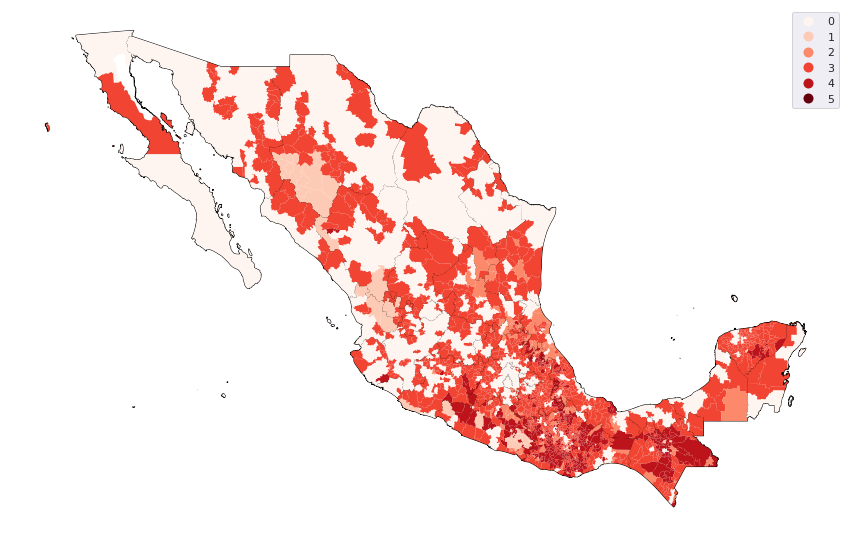

In [21]:
# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2 = pd.CategoricalIndex(layer_marg_2['Clusters_estand'], categories=[0, 1, 2, 3, 4, 5],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2.plot(column='Clusters_estand', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3, 4, 5]) 
# Remove axis
ax.set_axis_off()
plt.show()

## b)

#por si se necesita

In [22]:
mun = pd.read_excel(fileindex,sheet_name='IMM_2020', dtype=dict_dtypes)
labelList=list(mun['NOM_MUN']) #guardamos los nombres de los municipios
CVE_MUN=list(mun['CVE_MUN']) #guardamos las claves de los municipios
GM_2020=list(mun['GM_2020']) #guardamos los grados de marginación


In [23]:
mun = pd.read_excel(fileindex,sheet_name='IMM_2020', dtype=dict_dtypes)
labelList=list(mun['NOM_MUN'])

import numpy as np
from sklearn.decomposition import PCA

#usamos los datos estandarizados anteriormente "datos_scaled"

#X = datos_scaled
X=base_marg
pca = PCA(n_components=8)

pca.fit(X)
print("Varianza explicada:")
print(pca.explained_variance_ratio_)
print("Valores singulares:")
print(pca.singular_values_)

#Varianza acumulada
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])
print("Varianza acumulada:")
print(cum_explained_var)


Varianza explicada:
[0.73226449 0.13285275 0.04109183 0.03020301 0.02638881 0.01652781
 0.01152683 0.00715334]
Valores singulares:
[1877.86530936  799.86320839  444.84444505  381.3779353   356.48426955
  282.12271748  235.60550807  185.60296524]
Varianza acumulada:
[0.7322644948786744, 0.8651172424408994, 0.906209068622963, 0.9364120785500578, 0.9628008906178432, 0.9793286969687586, 0.990855529342242, 0.9980088701977783]


Nos quedamos con tres componentes ya que explican el 72.3%% de la varianza total. Por tal motivo, nos quedamos con $p=3$ dimensiones, correspondientes a los tres principales eigenvectors de acuerdo a la varianza acumlada que explican en su conjunto. Aunado a que 3 dimensiones explican gran parte de la varianza, también estamos simplificando el análisis mediante el uso de menos dimensiones )en vez de 6 que explican el 91% de la varianza total)


In [24]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

#Hacemos la predicción


In [25]:
comp_prin_marg = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
comp_prin_marg.index=labelList
comp_prin_marg

,principal component 1,principal component 2,principal component 3
Aguascalientes,73.944550,-13.488974,4.405416
Asientos,-1.534813,-17.363368,0.992312
Calvillo,21.213990,-4.939926,-6.612208
Cosío,11.325256,-14.915985,1.398388
Jesús María,43.647817,-17.111884,5.011569
...,...,...,...
Villa Hidalgo,-25.309367,-18.687812,-0.728718
Villanueva,15.395373,-6.721556,-8.021512
Zacatecas,73.550928,-12.927417,4.430876
Trancoso,54.089675,7.515312,-3.267902


In [26]:
comp_prin_marg = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
comp_prin_marg

,principal component 1,principal component 2,principal component 3
0,73.944550,-13.488974,4.405416
1,-1.534813,-17.363368,0.992312
2,21.213990,-4.939926,-6.612208
3,11.325256,-14.915985,1.398388
4,43.647817,-17.111884,5.011569
...,...,...,...
2464,-25.309367,-18.687812,-0.728718
2465,15.395373,-6.721556,-8.021512
2466,73.550928,-12.927417,4.430876
2467,54.089675,7.515312,-3.267902


In [27]:
data_with_clusters["Clusters"]

CVE_MUN
01001    2
01002    4
01003    4
01004    4
01005    2
        ..
32054    3
32055    4
32056    2
32057    1
32058    3
Name: Clusters, Length: 2469, dtype: int32

In [28]:
y = np.array(data_with_clusters["Clusters"])

comp_prin_marg['label'] = y

comp_prin_marg
kmeans=kmeans.fit(comp_prin_marg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 432x288 with 0 Axes>

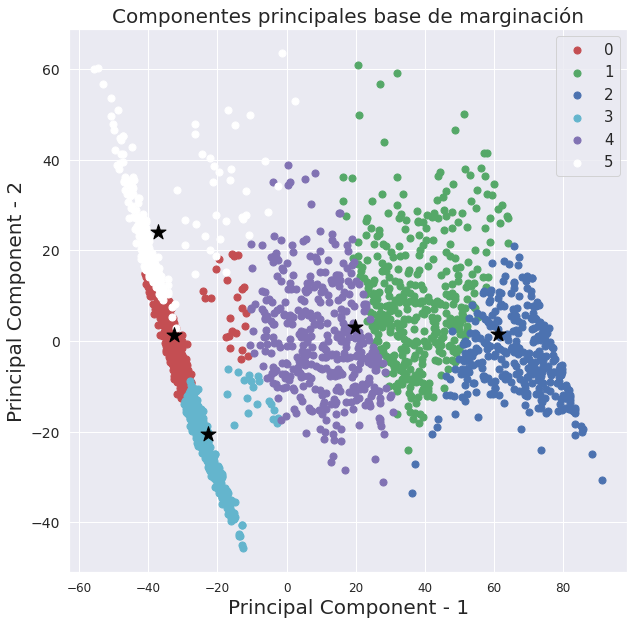

In [29]:


plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'c', 'm', "w"]
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['label'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 1']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

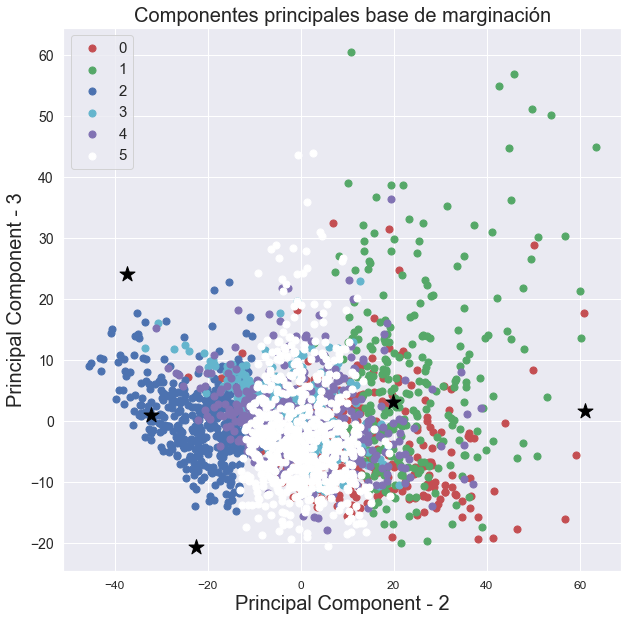

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 2',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'c', 'm', "w"]
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['label'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 2']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

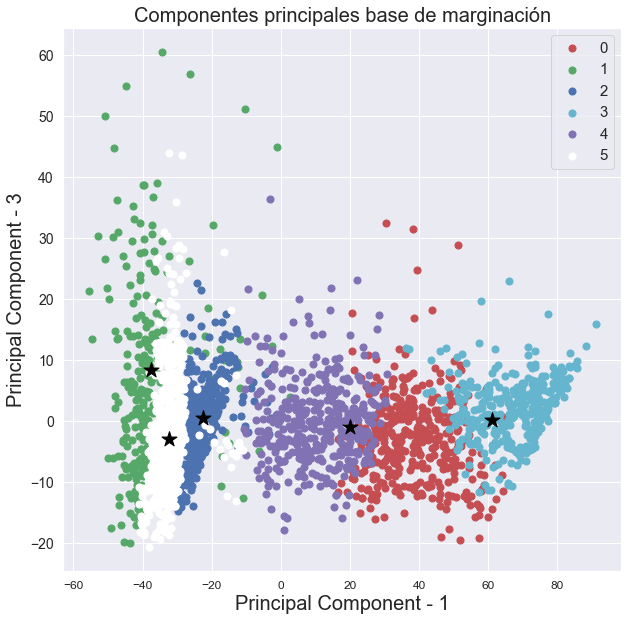

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'c', 'm', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['label'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 1']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

#Hacemos la predicción

loadings = pca.components_

In [ ]:
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
#feature_names = marg_municipal.feature_names
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
#loadings_df['feature_names'] = feature_names
#loadings_df = loadings_df.set_index('feature_names')
loadings_df = loadings_df.rename(index={0: 'ANALF', 1: 'SBASC', 2: 'OVSDE', 3: 'OVSEE', 4: 'OVSAE',
                                   5: 'OVPT', 6: 'VHAC', 7: 'PL.5000', 8: 'PO2SM'})
loadings_df

,PC1,PC2,PC3
ANALF,-0.114924,0.310918,-0.033244
SBASC,-0.262747,0.464723,-0.463402
OVSDE,-0.034994,0.091863,0.122067
OVSEE,-0.020467,0.051742,0.097516
OVSAE,-0.061542,0.229474,0.772140
OVPT,-0.104893,0.345811,0.254614
VHAC,-0.108656,0.483676,0.150213
PL.5000,-0.919031,-0.372062,0.091335
PO2SM,-0.211892,0.362808,-0.260403


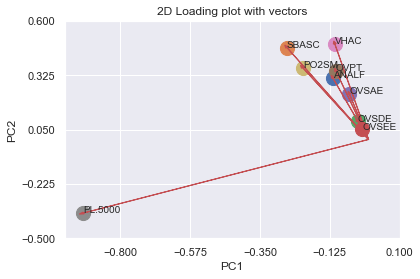

In [ ]:
# Plot the loadings on a scatterplot
variables=["ANALF", "SBASC", "OVSDE", "OVSEE", "OVSAE", "OVPT", "VHAC", "PL.5000", "PO2SM"]


for i, varnames in enumerate(variables):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.1, num=5)
yticks = np.linspace(-0.5, 0.6, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()


In [ ]:
#original_vs_clusters= marg_municipal[[ "IM_2020", "GM_2020"]]
original_vs_clusters=marg_municipal[[ "IM_2020", "GM_2020"]]
original_vs_clusters.insert(2, "Clusters", data_with_clusters[['Clusters']])
original_vs_clusters.insert(3, "PL.5000", marg_municipal[['PL.5000']])
original_vs_clusters=original_vs_clusters.sort_values(by=['IM_2020'], ascending=True)
original_vs_clusters

,IM_2020,GM_2020,Clusters,PL.5000
CVE_MUN,,,,
08008,21.406635,Muy alto,1,100.000000
10014,28.222995,Muy alto,1,100.000000
18009,28.670142,Muy alto,1,100.000000
14061,31.305668,Muy alto,1,100.000000
12078,32.205441,Muy alto,1,100.000000
...,...,...,...,...
19006,61.315874,Muy bajo,3,2.701748
09015,61.328534,Muy bajo,3,0.000000
19046,61.418383,Muy bajo,3,0.000000


In [ ]:
original_vs_clusters.loc[original_vs_clusters['Clusters'] == 5]

,IM_2020,GM_2020,Clusters,PL.5000
CVE_MUN,,,,
08041,43.886103,Muy alto,5,100.0
31049,46.505399,Muy alto,5,100.0
08020,46.975905,Muy alto,5,100.0
20480,48.023046,Muy alto,5,100.0
30180,48.112025,Muy alto,5,100.0
...,...,...,...,...
20524,55.036033,Bajo,5,100.0
20503,55.056764,Bajo,5,100.0
20518,55.078082,Bajo,5,100.0


In [ ]:
original_vs_clusters.loc[original_vs_clusters['Clusters'] == 4]

,IM_2020,GM_2020,Clusters,PL.5000
CVE_MUN,,,,
30103,47.854869,Muy alto,4,55.863739
30155,48.352787,Muy alto,4,66.760372
20469,49.140893,Alto,4,69.451562
07109,49.181208,Alto,4,53.019734
21010,49.522688,Alto,4,57.608870
...,...,...,...,...
08062,58.270168,Muy bajo,4,63.816891
15018,58.386093,Muy bajo,4,52.678532
29036,58.462788,Muy bajo,4,66.336722


In [ ]:
original_vs_clusters.loc[original_vs_clusters['Clusters'] == 3]

,IM_2020,GM_2020,Clusters,PL.5000
CVE_MUN,,,,
12035,55.789584,Bajo,3,13.827972
15100,55.859361,Bajo,3,5.875351
30133,56.007182,Bajo,3,18.489354
23009,56.147960,Bajo,3,28.567454
16090,56.207439,Bajo,3,9.120980
...,...,...,...,...
19006,61.315874,Muy bajo,3,2.701748
09015,61.328534,Muy bajo,3,0.000000
19046,61.418383,Muy bajo,3,0.000000


In [ ]:
original_vs_clusters.loc[original_vs_clusters['Clusters'] == 2]

,IM_2020,GM_2020,Clusters,PL.5000
CVE_MUN,,,,
32021,51.694169,Alto,2,100.0
10037,51.822325,Alto,2,100.0
12068,52.002612,Alto,2,100.0
22015,52.504723,Alto,2,100.0
11040,52.549992,Alto,2,100.0
...,...,...,...,...
20035,58.307489,Muy bajo,2,100.0
26034,58.340172,Muy bajo,2,100.0
26013,58.341646,Muy bajo,2,100.0


In [ ]:
original_vs_clusters.loc[original_vs_clusters['Clusters'] == 1]

,IM_2020,GM_2020,Clusters,PL.5000
CVE_MUN,,,,
08008,21.406635,Muy alto,1,100.000000
10014,28.222995,Muy alto,1,100.000000
18009,28.670142,Muy alto,1,100.000000
14061,31.305668,Muy alto,1,100.000000
12078,32.205441,Muy alto,1,100.000000
...,...,...,...,...
20249,50.587098,Alto,1,100.000000
20527,50.872270,Alto,1,100.000000
20069,51.044339,Alto,1,100.000000


## PCA-Kernel

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import norm

from sklearn.decomposition import KernelPCA
#from spectral_clustering import get_dataset


In [31]:
#Definiendo el número de clusters para los datos sin estandarizar
kmeans=KMeans(5)
kmeans.fit(base_marg)
indentified_clusters_est = kmeans.fit_predict(base_marg)
data_with_clusters = base_marg.copy()
data_with_clusters['Clusters'] = indentified_clusters 
y = np.array(data_with_clusters["Clusters"])
y

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 4, 4, ..., 2, 1, 3], dtype=int32)

In [ ]:
#Definiendo el número de clusters para los datos estandarizados
kmeans=KMeans(5)
kmeans.fit(datos_scaled)
indentified_clusters_est = kmeans.fit_predict(datos_scaled)
data_with_clusters_est = base_marg.copy()
data_with_clusters_est['Clusters'] = indentified_clusters_est 
y_est = np.array(data_with_clusters_est["Clusters"])
y_est

array([1, 3, 1, ..., 1, 1, 3])

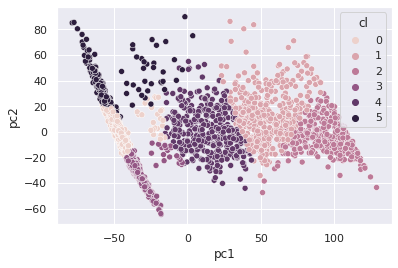

In [32]:
#Kernel PCA con datos sin estandarizar

kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(base_marg)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,1],cl=y))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()

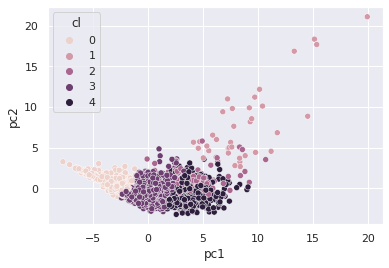

In [33]:


#Kernel PCA polinomial con datos estandarizados
kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(datos_scaled)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,1],cl=y_est))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()

In [34]:
######Desde aquí saco primero KernelPCA para ver los componentes que salen
#A eso veo cuántos clústeres se sugieren a los componentes (nuevo de 28 de marzo de 2023) 

#transformer = KernelPCA(n_components=7, kernel='linear') 
X_transformed = kpca.fit_transform(datos_scaled)

In [35]:
#Varianza explicada (es nuevo, 28 de marzo de 2023)
explained_variance = np.var(X_transformed, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
np.cumsum(explained_variance_ratio)
#Nos quedamos con 4 componentes principales, 
#los cuales explican el 81% de la varianza

array([0.49168927, 0.63449535, 0.72788288, 0.81057461, 0.87350614,
       0.91778006, 0.9539763 , 0.98142991, 1.        ])

In [36]:
X_transformed_reducido=pd.DataFrame(X_transformed.copy())
X_transformed_reducido.drop(X_transformed_reducido.columns[[4,5,6,7,8]], 
                            axis=1, inplace=True)
X_transformed_reducido

,0,1,2,3
0,-5.441642,1.696295,-0.581009,-0.303202
1,-1.967310,-0.191362,0.805013,0.188222
2,-2.181395,-0.456648,0.235385,-0.005891
3,-2.404253,-0.218877,0.310099,0.036415
4,-4.273720,1.137838,-0.195369,-0.086555
...,...,...,...,...
2464,-0.748535,-1.074856,1.170680,0.689084
2465,-1.977384,-0.401602,0.782141,0.318145
2466,-5.337504,1.646505,-0.587531,-0.145525
2467,-2.322381,0.606915,-0.490647,-0.957214


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

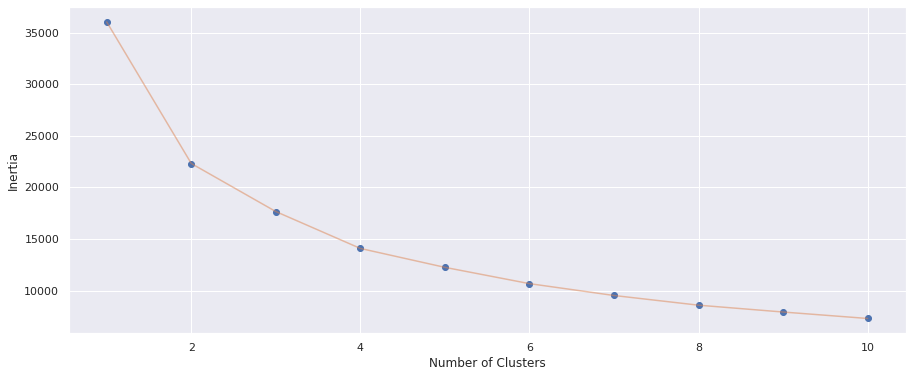

In [37]:
#Analizamos el número de clusters sugeridos para los datos de Kernel PCA

inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X_transformed_reducido)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#En la siguiente gráfica se muestra que podríamos seleccionar entre 4 y 6 clústeres

In [38]:
#Especificamos el número de clusters para el objeto KMeans
kmeans=KMeans(n_clusters=6)

#Analizamos el clustering de los datos de la base de marg_municipal y vemos el resultado
kmeans.fit(X_transformed_reducido)


indentified_clusters = kmeans.fit_predict(X_transformed_reducido)
data_with_clusters = X_transformed.copy()
indentified_clusters
#data_with_clusters['Clusters'] = indentified_clusters 
#print(data_with_clusters)

#result = data_with_clusters.dtypes

#print("Output:")
#print(result)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, ..., 2, 2, 1], dtype=int32)

In [41]:
data_with_clusters.shape

(2469, 9)

In [42]:
data_frame_kpca=pd.DataFrame(data_with_clusters)
print(data_frame_kpca)

             0         1         2         3         4         5         6  \
0    -5.441642  1.696295 -0.581009 -0.303202  0.662967  0.836097 -0.608787   
1    -1.967310 -0.191362  0.805013  0.188222 -0.313528 -0.856465 -0.229720   
2    -2.181395 -0.456648  0.235385 -0.005891  0.086131  0.119636  0.640763   
3    -2.404253 -0.218877  0.310099  0.036415 -0.186039 -1.236302  0.260457   
4    -4.273720  1.137838 -0.195369 -0.086555  0.584331  0.423565 -0.955066   
...        ...       ...       ...       ...       ...       ...       ...   
2464 -0.748535 -1.074856  1.170680  0.689084 -0.675602 -1.029327  0.225541   
2465 -1.977384 -0.401602  0.782141  0.318145 -0.143894  0.297373  0.743558   
2466 -5.337504  1.646505 -0.587531 -0.145525  0.523060  0.671935 -0.342071   
2467 -2.322381  0.606915 -0.490647 -0.957214 -0.739896 -0.292302  1.105663   
2468 -1.455703 -1.087533  1.256407  0.935950  0.199811 -0.156345 -0.312463   

             7         8  
0     0.039223 -0.335188  
1    -0.2

In [43]:
#Varianza explicada
kpca_transform = kpca.fit_transform(data_frame_kpca)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
np.cumsum(explained_variance_ratio)

#Se sugiere quedarse con 4 componentes principales y 6 clusters

#número de clusters
num_clusteres_kpca = np.array(indentified_clusters)
num_clusteres_kpca


array([2, 1, 1, ..., 2, 2, 1], dtype=int32)

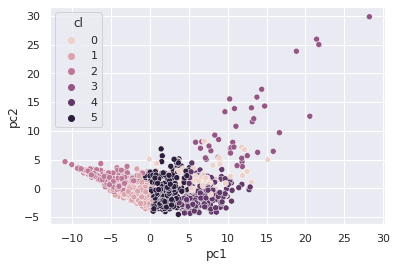

In [44]:
#Kernel PCA polinomial con datos estandarizados
kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(data_frame_kpca)



scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,1],cl=num_clusteres_kpca))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()